In [1]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

print(train_data)


[list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207,

In [2]:

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)


In [3]:
"""
## 신경망 모델 구축
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
#model.add(tf.keras.layers.Dense(16, activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
"""

"\n## 신경망 모델 구축\n#model = tf.keras.Sequential()\n#model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))\n#model.add(tf.keras.layers.Dense(16, activation='relu'))\n#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))\n\n#model.compile(loss='binary_crossentropy', optimizer='adam',\n                  metrics=['accuracy'])\n"

In [4]:
import tensorflow as tf

# 입력 레이어
inputs = tf.keras.Input(shape=(1000,))

x1 = tf.keras.layers.Dense(16, activation='relu')(inputs)
x2 = tf.keras.layers.Dense(16, activation='relu')(x1)
x3 = tf.keras.layers.Dense(8, activation='relu')(x2)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x3)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping() 그냥 하니까 epoch를 2번만 돌려서 매개변수 추가
early_stopping = EarlyStopping(patience=3)

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2,
                    callbacks = [early_stopping])


Epoch 1/20
49/49 - 1s - loss: 0.5737 - accuracy: 0.7173 - val_loss: 0.4267 - val_accuracy: 0.8214 - 1s/epoch - 24ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3643 - accuracy: 0.8479 - val_loss: 0.3446 - val_accuracy: 0.8536 - 373ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3182 - accuracy: 0.8682 - val_loss: 0.3301 - val_accuracy: 0.8595 - 388ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3028 - accuracy: 0.8737 - val_loss: 0.3336 - val_accuracy: 0.8589 - 432ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.2947 - accuracy: 0.8771 - val_loss: 0.3277 - val_accuracy: 0.8602 - 379ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2885 - accuracy: 0.8800 - val_loss: 0.3309 - val_accuracy: 0.8572 - 377ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2800 - accuracy: 0.8833 - val_loss: 0.3290 - val_accuracy: 0.8589 - 374ms/epoch - 8ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2742 - accuracy: 0.8866 - val_loss: 0.3345 - val_accuracy: 0.8593 - 355ms/epoch - 7ms/step


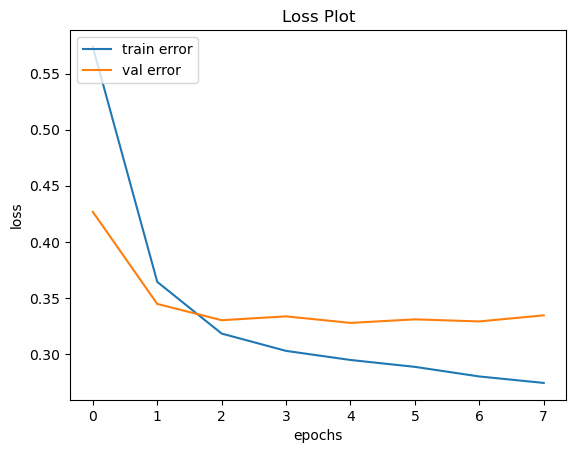

In [6]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()


In [7]:
model.evaluate(test_data, test_labels)

782/782 [==============================] - 2s 2ms/step - loss: 0.3345 - accuracy: 0.8593


[0.3344515562057495, 0.8593199849128723]

In [8]:
import tensorflow as tf

# 입력 레이어
second_inputs = tf.keras.Input(shape=(1000,))

second_x1 = tf.keras.layers.Dense(16, activation='relu')(second_inputs)
second_x1 = tf.keras.layers.Dropout(0.5)(second_x1)

second_x2 = tf.keras.layers.Dense(16, activation='relu')(second_x1)
second_x2 = tf.keras.layers.Dropout(0.5)(second_x2)

second_x3 = tf.keras.layers.Dense(8, activation='relu')(second_x2)
second_x3 = tf.keras.layers.Dropout(0.5)(second_x3)

second_outputs = tf.keras.layers.Dense(1, activation='sigmoid')(second_x3)

second_model = tf.keras.Model(inputs= second_inputs, outputs= second_outputs)

second_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

second_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_4 (Dense)             (None, 16)                16016     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0   

In [9]:

# 신경망 훈련, 검증 데이터 전달
second_history = second_model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2,
                    callbacks = [early_stopping])


Epoch 1/20
49/49 - 1s - loss: 0.6913 - accuracy: 0.5353 - val_loss: 0.6790 - val_accuracy: 0.6659 - 1s/epoch - 27ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6588 - accuracy: 0.6399 - val_loss: 0.6240 - val_accuracy: 0.7586 - 442ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.6015 - accuracy: 0.7270 - val_loss: 0.5306 - val_accuracy: 0.8162 - 448ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.5405 - accuracy: 0.7830 - val_loss: 0.4634 - val_accuracy: 0.8380 - 447ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.5037 - accuracy: 0.8046 - val_loss: 0.4381 - val_accuracy: 0.8421 - 441ms/epoch - 9ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4760 - accuracy: 0.8162 - val_loss: 0.4059 - val_accuracy: 0.8505 - 438ms/epoch - 9ms/step
Epoch 7/20
49/49 - 0s - loss: 0.4518 - accuracy: 0.8296 - val_loss: 0.3923 - val_accuracy: 0.8522 - 422ms/epoch - 9ms/step
Epoch 8/20
49/49 - 0s - loss: 0.4392 - accuracy: 0.8350 - val_loss: 0.3815 - val_accuracy: 0.8544 - 429ms/epoch - 9ms/step
Epoch 9/20
49/49 -

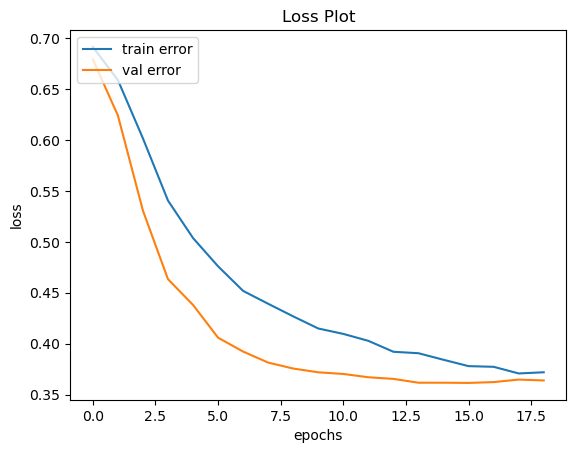

In [10]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
second_history_dict = second_history.history
second_loss_values = second_history_dict['loss']		# 훈련 데이터 손실값
second_val_loss_values = second_history_dict['val_loss']	# 검증 데이터 손실값
second_acc = second_history_dict['accuracy']			# 정확도
second_epochs = range(1, len(second_acc) + 1)		# 에포크 수

plt.plot(second_history.history['loss'])
plt.plot(second_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()


In [11]:
second_model.evaluate(test_data, test_labels)

782/782 [==============================] - 2s 2ms/step - loss: 0.3640 - accuracy: 0.8505


[0.3639744222164154, 0.8504800200462341]